# Think Bayes Homework 3

This notebook presents example code and exercise solutions for Think Bayes.

Camille Girard

MIT License: https://opensource.org/licenses/MIT

In [74]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite, Beta, MakeGammaPmf
import thinkbayes2

import thinkplot
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
from thinkbayes2 import MakePoissonPmf

class BayesTable(pd.DataFrame):
    def __init__(self, hypo, prior=1):
        columns = ['hypo', 'prior', 'likelihood', 'unnorm', 'posterior']
        super().__init__(columns=columns)
        self.hypo = hypo
        self.prior = prior
    
    def mult(self):
        self.unnorm = self.prior * self.likelihood
        
    def norm(self):
        nc = np.sum(self.unnorm)
        self.posterior = self.unnorm / nc
        return nc
    
    def update(self):
        self.mult()
        return self.norm()
    
    def reset(self):
        return BayesTable(self.hypo, self.posterior)

ERROR:root:The 'ast_node_interactivity' trait of a ZMQInteractiveShell instance must be any of ['all', 'last', 'last_expr', 'none'], but a value of 'last_expr_or_assign' <class 'str'> was specified.


# The Flea Beetle Problem

Different species of flea beetle can be distinguished by the width and angle of the aedeagus. The data below includes measurements and know species classification for 74 specimens.

Suppose you discover a new specimen under conditions where it is equally likely to be any of the three species. You measure the aedeagus and width 140 microns and angle 15 (in multiples of 7.5 degrees). What is the probability that it belongs to each species?

In [33]:
data = pd.read_csv('../data/flea_beetles.csv', delimiter='\t')

In [34]:
species = data['Species']

In [35]:
con_beetles = data[0:21]
con_mu_w,con_std_w = norm.fit(con_beetles['Width'])
con_mu_a,con_std_a = norm.fit(con_beetles['Angle'])

In [36]:
hei_beetles = data[21:52]
hei_mu_w,hei_std_w = norm.fit(hei_beetles['Width'])
hei_mu_a,hei_std_a = norm.fit(hei_beetles['Angle'])

In [37]:
hep_beetles = data[52:74]
hep_mu_w,hep_std_w = norm.fit(hep_beetles['Width'])
hep_mu_a,hep_std_a = norm.fit(hep_beetles['Angle'])

In [38]:
con = norm(con_mu_w, con_std_w)
hei = norm(hei_mu_w, hei_std_w)
hep = norm(hep_mu_w, hep_std_w)
con_a = norm(con_mu_a, con_std_a)
hei_a = norm(hei_mu_a, hei_std_a)
hep_a = norm(hep_mu_a, hep_std_a)

In [39]:
beetles = BayesTable(['Con', 'Hei','Hep'], [1,1,1])
beetles.likelihood = [con.pdf(140)*con_a.pdf(15), hei.pdf(140)*hei_a.pdf(15), hep.pdf(140)* hep_a.pdf(15)]
beetles.update()
beetles

,hypo,prior,likelihood,unnorm,posterior
0,Con,1,1.027345e-02,1.027345e-02,0.991579
1,Hei,1,8.718850e-05,8.718850e-05,0.008415
2,Hep,1,5.869521e-08,5.869521e-08,0.000006


# The Alien Blaster Problem

In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders.  Of course, some missile designs are better than others; let's assume that each design has some probability of hitting an alien ship, x.

Based on previous tests, the distribution of x in the population of designs is well described by a Beta distribution with parameters 5, 10.

Now suppose the new ultra-secret Alien Blaster 9000 is being tested.  In a press conference, an EDL general reports that the new design has been tested twice, taking two shots during each test.  The results of the test are confidential, so the general won't say how many targets were hit, but they report: ``The same number of targets were hit in the two tests, so we have reason to think this new design is consistent.''

Is this data good or bad; that is, does it increase or decrease your estimate of x for the Alien Blaster 9000?

0.3333333333333333

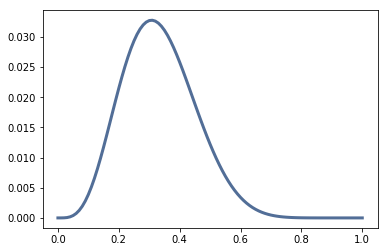

In [40]:
prior = Beta(5, 10)
thinkplot.Pdf(prior.MakePmf())
prior.Mean()

In [41]:
from scipy import stats

class AlienBlaster(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likeliood of data under hypo.
        
        data: number of shots they took
        hypo: probability of a hit, p
        """
        n = data
        x = hypo
        
        # specific version for n=2 shots
        likes = [x**4, (1-x)**4, (2*x*(1-x))**2]

        # general version for any n shots
        likes = [stats.binom.pmf(k, n, x)**2 for k in range(n+1)]
        
        return np.sum(likes)

0.3175635713858314

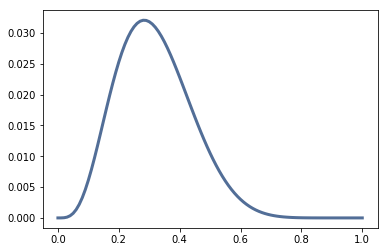

In [42]:
pmf =  Beta(5, 10).MakePmf()
blaster = AlienBlaster(pmf)
blaster.Update(2)
thinkplot.Pdf(blaster)
blaster.Mean()

# The Grizzly Bear Problem

In 1996 and 1997 Mowat and Strobeck deployed bear traps in locations in British Columbia and Alberta, in an effort to estimate the population of grizzly bears.  They describe the experiment in "Estimating Population Size of Grizzly Bears Using Hair Capture, DNA Profiling, and Mark-Recapture Analysis"

The "trap" consists of  a lure and several strands of barbed wire intended to capture samples of hair from bears that visit the lure.  Using the hair samples, the researchers use DNA analysis to identify individual bears.

During the first session, on June 29, 1996, the researchers deployed traps at 76 sites.  Returning 10 days later, they obtained 1043 hair samples and identified 23 different bears.  During a second 10-day session they obtained 1191 samples from 19 different bears, where 4 of the 19 were from bears they had identified in the first batch.

To estimate the population of bears from this data, we need a model for the probability that each bear will be observed during each session.  As a starting place, we'll make the simplest assumption, that every bear in the population has the same (unknown) probability of being sampled during each round.

We also need a prior distribution for the population.  As a starting place, let's suppose that, prior to this study, an expert in this domain would have estimated that the population is between 100 and 500, and equally likely to be any value in that range.

In [43]:
# optained 1043 23 bears 
# 1191 from 19 and 4 same 
# each bear has same chance of being caught - need model for prob of being observed

In [223]:
class Bears(Suite):
    # hypo is the number of bears
    # data is the observed bear 
    def Likelihood(self, data, hypo):
        if data > hypo:
            return 0
        else:
            return 1 / hypo

299.50000000000017

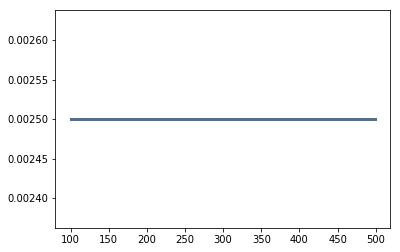

In [229]:
bear_pop = Bears(range(100,500))
thinkplot.Pdf(bear_pop)
bear_pop.Mean()

0.09090909090909091

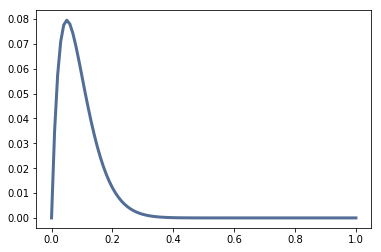

In [241]:
catch = Beta(2,20)
thinkplot.Pdf(catch.MakePmf())
catch.Mean()

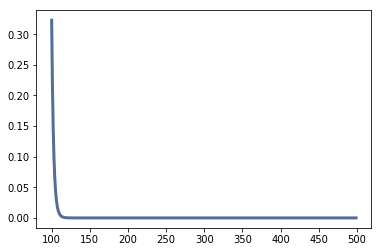

In [236]:
for i in range(23, 38):
    bear_pop.Update(i)
thinkplot.Pdf(bear_pop)

# World Cup Part 2 

In the final match of the 2014 FIFA World Cup, Germany defeated Argentina 1-0. How much evidence does this victory provide that Germany had the better team? What is the probability that Germany would win a rematch?

In [194]:
# goals per game in 2014 world cup found on https://www.economist.com/node/21603828
xs = np.linspace(0, 8, 101)
pmf_g = MakeGammaPmf(xs, 2.57)
pmf_a = MakeGammaPmf(xs, 1.14)

In [212]:
class Soccer(Suite):
    """Represents hypotheses about goal-scoring rates."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: scoring rate in goals per game
        data: goals in game time interval
        """
        lam = hypo
        x = data/90
        if data == 0:
            x = 1
        return lam * (math.exp(-lam*x))

In [213]:
argentina = Soccer(pmf_a)
germany = Soccer(pmf_g)

1.1627609108450838 2.520809040899569


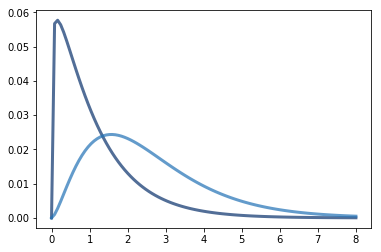

In [214]:
thinkplot.Pdf(argentina)
thinkplot.Pdf(germany)
print(argentina.Mean(), germany.Mean())

1.0712363148766666 1.5826998480652419


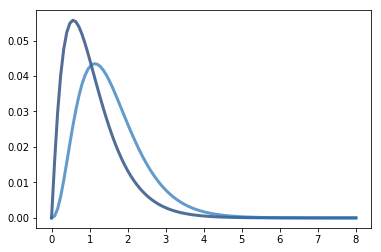

In [215]:
germany.Update(113)
argentina.Update(0)
thinkplot.Pdf(argentina)
thinkplot.Pdf(germany)
print(argentina.Mean(), germany.Mean())

In [216]:
post_prob = germany.ProbGreater(argentina)
post_prob

0.6810062099577847

In [217]:
metapmf = Pmf()

for lam, prob in argentina.Items():
    lt = lam * 1
    pred = MakePoissonPmf(lt, 15)
    metapmf[pred] = prob
    
metapmf2 = Pmf()

for lam, prob in germany.Items():
    lt = lam * 1
    pred = MakePoissonPmf(lt, 15)
    metapmf2[pred] = prob

In [218]:
def MakeMixture(metapmf, label='mix'):
    """Make a mixture distribution.

    Args:
      metapmf: Pmf that maps from Pmfs to probs.
      label: string label for the new Pmf.

    Returns: Pmf object.
    """
    mix = Pmf(label=label)
    for pmf, p1 in metapmf.Items():
        for x, p2 in pmf.Items():
            mix[x] += p1 * p2
    return mix

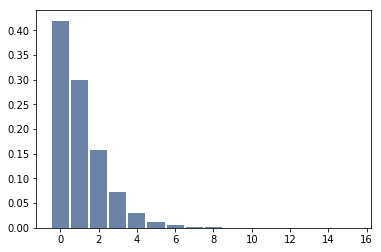

In [219]:
mix = MakeMixture(metapmf)
thinkplot.Hist(mix)

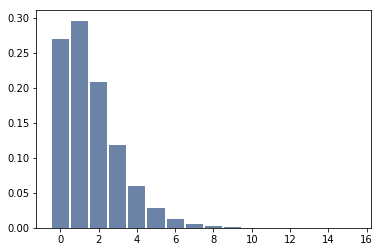

In [220]:
mix2 = MakeMixture(metapmf2)
thinkplot.Hist(mix2)

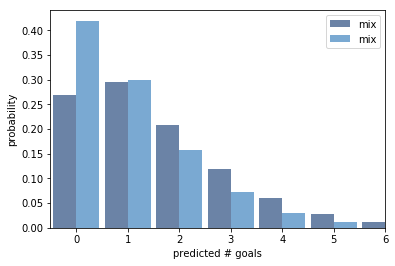

In [221]:
thinkplot.Hist(mix2, width=0.45, align='right')
thinkplot.Hist(mix, width=0.45, align='left')
thinkplot.Config(xlabel='predicted # goals', ylabel='probability', xlim=[-0.5, 6])

In [222]:
win = mix2.ProbGreater(mix)
lose = mix2.ProbLess(mix)
tie = 1 - (win + lose)

print('posterior prob Germany wins rematch', win)
print('posterior prob Argentina wins rematch', lose)
print('posterior prob tie', tie)

posterior prob Germany wins rematch 0.4815813353082399
posterior prob Argentina wins rematch 0.27316533115364744
posterior prob tie 0.24525333353811263


# The Red Dice Problem

Suppose I have a six-sided die that is red on 2 sides and blue on 4 sides, and another die that's the other way around, red on 4 sides and blue on 2.
 
I choose a die at random and roll it, and I tell you it came up red. What is the probability that I rolled the second die (red on 4 sides)?  And if I do it again, what's the probability that I get red again?

Note: This question is deliberately ambiguous.  What are the two possible scenarios, and what are the answers in each scenario?

In [15]:
red_dice = BayesTable(['Dice 1', 'Dice 2'], [0.5,0.5])
red_dice.likelihood = [2/6, 4/6]
red_dice.update()
red_dice

,hypo,prior,likelihood,unnorm,posterior
0,Dice 1,0.5,0.333333,0.166667,0.333333
1,Dice 2,0.5,0.666667,0.333333,0.666667


In [60]:
# if roll again - this is the p(next) of red
p_next = (1/3)*(2/6) + (2/6)*(4/6)
p_next

0.3333333333333333

# World Cup Final Betting

Knowing that Croatia and France are playing the Fifa World Cup final, you are betting with your friends at a bar. Which team and which goal difference should you bet on initially? 

In [256]:
# goals per game in 2014 world cup found on https://www.fifa.com/worldcup/teams/team/43946/ w/0 final score
xs = np.linspace(0, 8, 101)
pmf_c = MakeGammaPmf(xs, 2)
pmf_f = MakeGammaPmf(xs, 1.7)

In [257]:
croatia = Soccer(pmf_c)
france = Soccer(pmf_f)

1.9801660290552032 1.6913931948892005


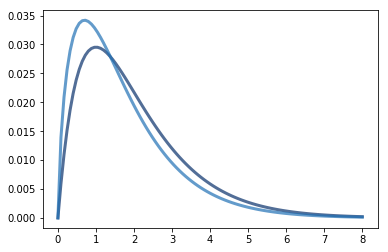

In [258]:
thinkplot.Pdf(croatia)
thinkplot.Pdf(france)
print(croatia.Mean(), france.Mean())

In [259]:
metapmf_c = Pmf()

for lam, prob in croatia.Items():
    lt = lam * 1
    pred = MakePoissonPmf(lt, 15)
    metapmf_c[pred] = prob
    
mixc = MakeMixture(metapmf_c)

metapmf_f = Pmf()

for lam, prob in france.Items():
    lt = lam * 1
    pred = MakePoissonPmf(lt, 15)
    metapmf_f[pred] = prob
    
mixf = MakeMixture(metapmf_f)

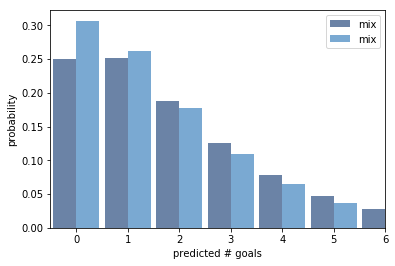

In [260]:
thinkplot.Hist(mixc, width=0.45, align='right')
thinkplot.Hist(mixf, width=0.45, align='left')
thinkplot.Config(xlabel='predicted # goals', ylabel='probability', xlim=[-0.5, 6])

In [261]:
win = mixc.ProbGreater(mixf)
lose = mixc.ProbLess(mixf)
tie = 1 - (win + lose)

print('croatia win', win)
print('croatia lose', lose)
print('tie', tie)

croatia win 0.44630663014375005
croatia lose 0.35643693441218693
tie 0.19725643544406302


Initially bet on Croatia to win and have a goal difference of 1

How about at halftime?

In [263]:
france.Update(18)
france.Update(20)
croatia.Update(28)

0.8888738594208544

2.276316291900055 2.882112939582811


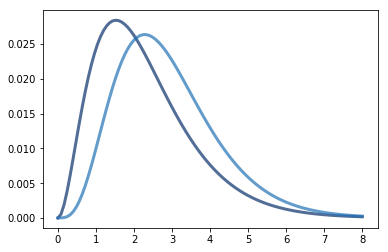

In [264]:
thinkplot.Pdf(croatia)
thinkplot.Pdf(france)
print(croatia.Mean(), france.Mean())

In [265]:
metapmf_c = Pmf()

for lam, prob in croatia.Items():
    lt = lam * 1
    pred = MakePoissonPmf(lt, 15)
    metapmf_c[pred] = prob
    
mixc = MakeMixture(metapmf_c)

metapmf_f = Pmf()

for lam, prob in france.Items():
    lt = lam * 1
    pred = MakePoissonPmf(lt, 15)
    metapmf_f[pred] = prob
    
mixf = MakeMixture(metapmf_f)

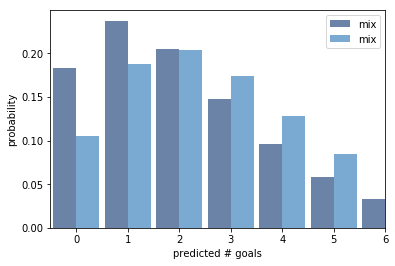

In [266]:
thinkplot.Hist(mixc, width=0.45, align='right')
thinkplot.Hist(mixf, width=0.45, align='left')
thinkplot.Config(xlabel='predicted # goals', ylabel='probability', xlim=[-0.5, 6])

In [267]:
win = mixc.ProbGreater(mixf)
lose = mixc.ProbLess(mixf)
tie = 1 - (win + lose)

print('croatia win', win)
print('croatia lose', lose)
print('tie', tie)

croatia win 0.3360745478323337
croatia lose 0.5125911586402537
tie 0.15133429352741257


May be worth changing over to france winning by one goal